In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
dat = pd.read_csv('./data/spotify-2023.csv', index_col = 0)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

In [3]:
df = pd.read_csv('./data/songs_complete_data.csv', index_col=0)
df.drop(['lyrics', 'explicit'], axis=1, inplace=True)


In [46]:
df = df.reset_index(drop=True)


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Top100,9226.0,0.162692,0.369105,0.000000,0.000000,0.000000,0.000000,1.000
Danceability,9226.0,0.624711,0.154501,0.061700,0.526000,0.632000,0.736000,0.981
Energy,9226.0,0.662369,0.205162,0.002890,0.525000,0.694000,0.827000,0.997
Key,9226.0,5.334815,3.582050,0.000000,2.000000,5.000000,8.000000,11.000
Loudness,9226.0,-7.097625,3.367559,-36.729000,-8.674000,-6.316500,-4.782250,1.342
Mode,9226.0,0.644917,0.478565,0.000000,0.000000,1.000000,1.000000,1.000
Speechiness,9226.0,0.095369,0.095961,0.022800,0.036400,0.052700,0.108750,0.869
Acousticness,9226.0,0.234841,0.274592,0.000001,0.019225,0.111000,0.370750,0.996
Instrumentalness,9226.0,0.040521,0.149607,0.000000,0.000000,0.000005,0.000888,0.982
Liveness,9226.0,0.181757,0.145542,0.011900,0.092700,0.123000,0.229000,0.986


# Distribution of Top100

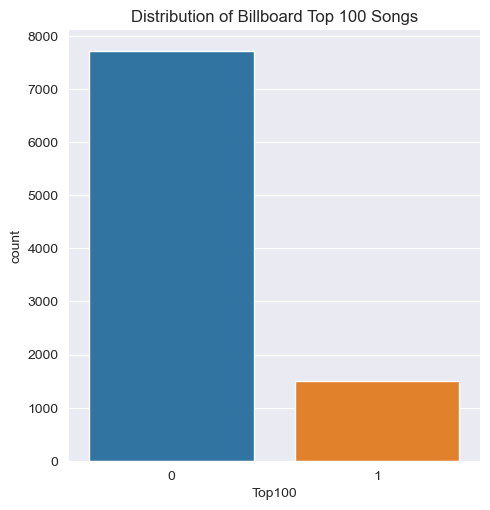

In [6]:
fig1 = sns.catplot(x="Top100", kind="count", data=df)
fig1.set(title='Distribution of Billboard Top 100 Songs')
fig1.savefig("data-distribution.png")
plt.show()

* (1) = 1501

* (0) = 7725

# Distribution of Song Release Year

In [7]:
decade_90 = df[(df.Release_Year >= 1990) & (df.Release_Year < 2000)].shape[0]
decade_00 = df[(df.Release_Year >= 2000) & (df.Release_Year < 2010)].shape[0]
decade_10 = df[(df.Release_Year >= 2010) & (df.Release_Year < 2019)].shape[0]

In [8]:
decades = ['1990s', '2000s', '2010s']
decade_frq = [decade_90, decade_00, decade_10]

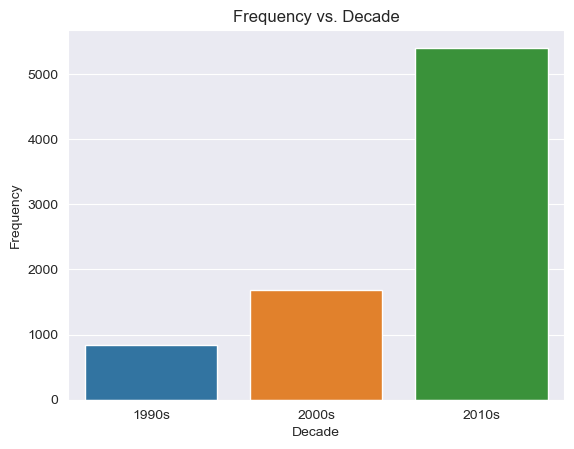

In [10]:
fig2 = sns.barplot(x=decades, y=decade_frq)
fig2.set(xlabel='Decade', ylabel='Frequency', title='Frequency vs. Decade')
fig2.figure.savefig("fig-vs-decade.png")
plt.show()

* 1990's = 833
* 2000's = 1680
* 2010's = 5406

# Distribution of Genre

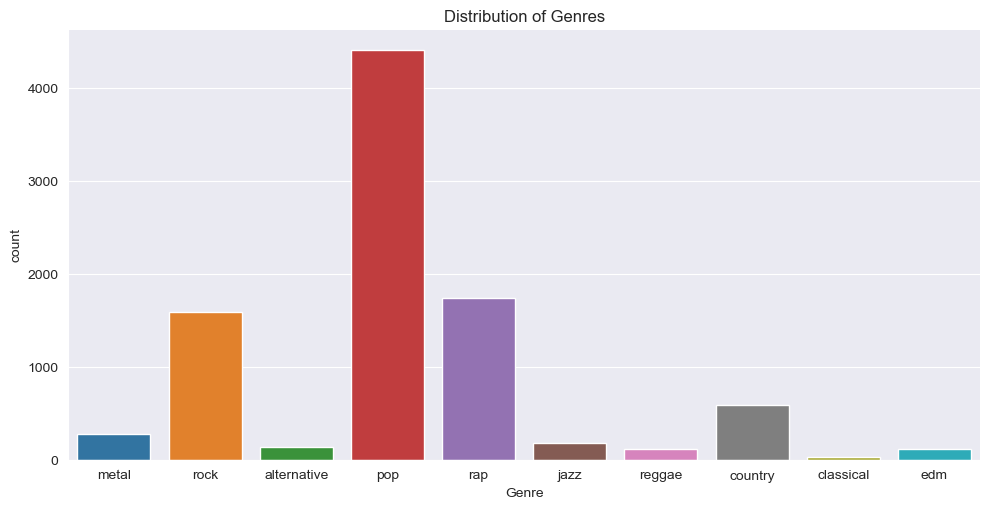

In [12]:
fig3 = sns.catplot(x="Genre", kind="count", data=df, height=5, aspect=2)
fig3.set(title='Distribution of Genres')
fig3.savefig('genre-dist.png')
plt.show()

# (Spotify) Music Features over Time (2000-2018)

In [13]:
df2 = df[(df.Release_Year >= 2000) & (df.Release_Year < 2019)]

### Danceability vs. Time

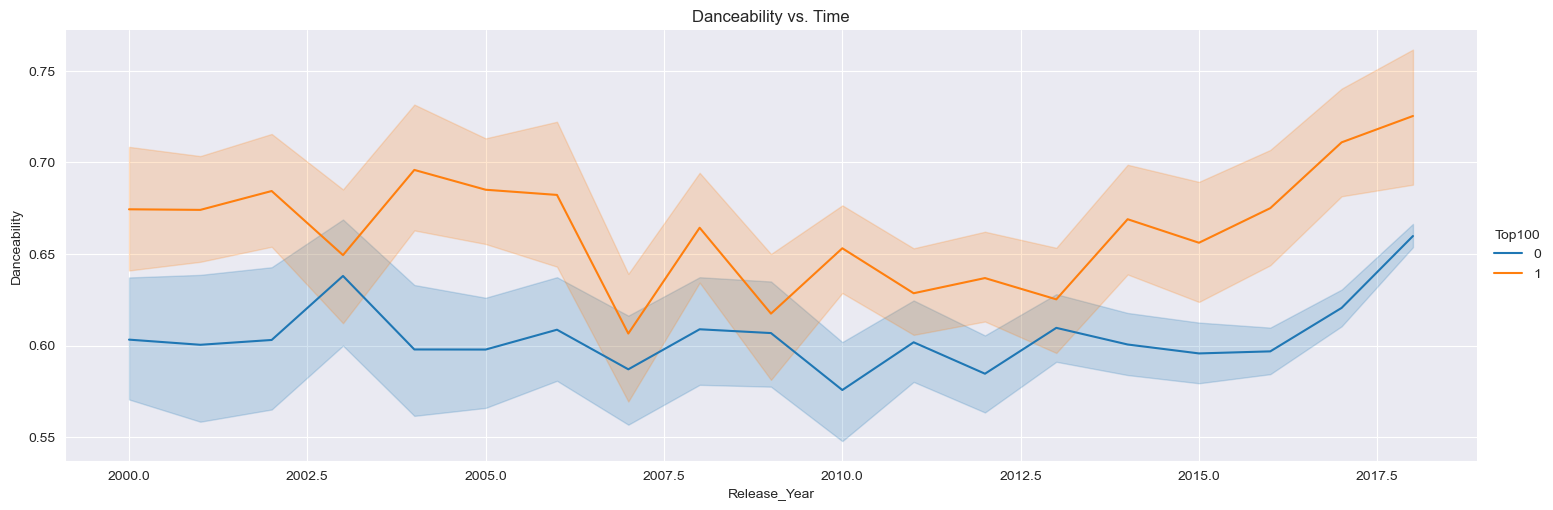

In [15]:
fig4 = sns.relplot(x="Release_Year", y="Danceability", hue="Top100", kind="line", data=df2, height=5, aspect=3)
fig4.set(title='Danceability vs. Time')
fig4.savefig('dance-vs-time.png')

### Energy vs. Time

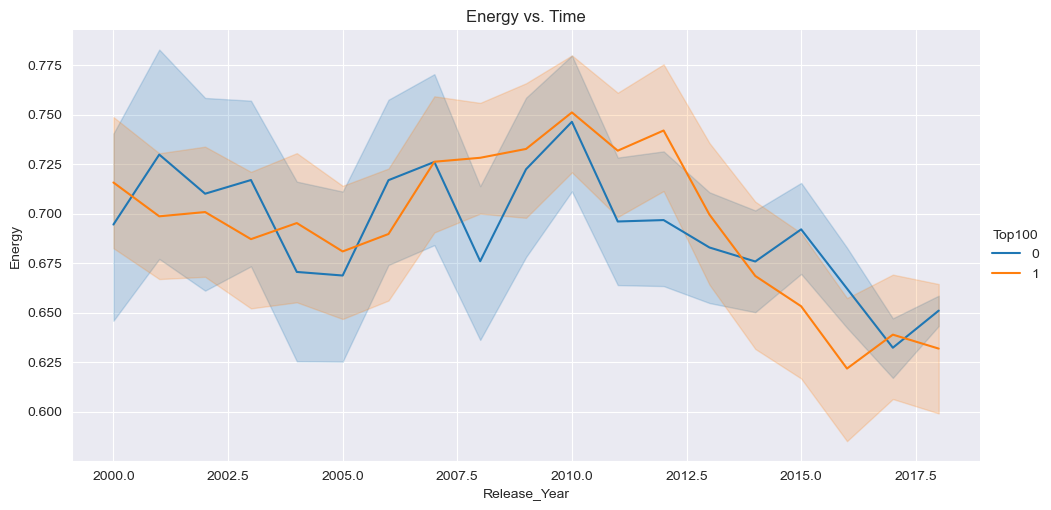

In [16]:
fig5 = sns.relplot(x="Release_Year", y="Energy", hue="Top100", kind="line", data=df2, height=5, aspect=2)
fig5.set(title='Energy vs. Time')
fig5.savefig('energy-vs-time.png')

### Loudness vs. Time

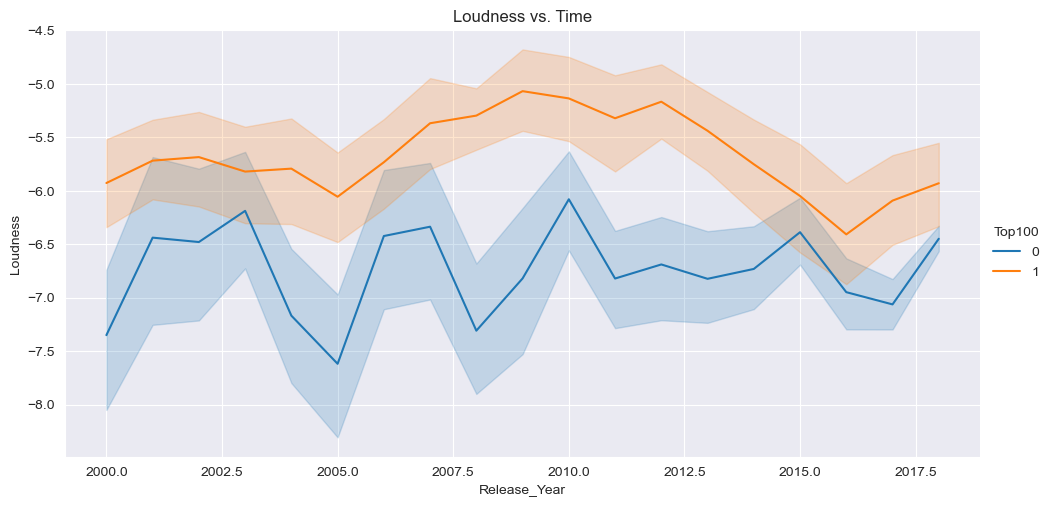

In [18]:
fig6 = sns.relplot(x="Release_Year", y="Loudness", hue="Top100", kind="line", data=df2, height=5, aspect=2)
fig6.set(title='Loudness vs. Time')
fig6.savefig('loud-vs-time.png')

### Speechiness vs. Time

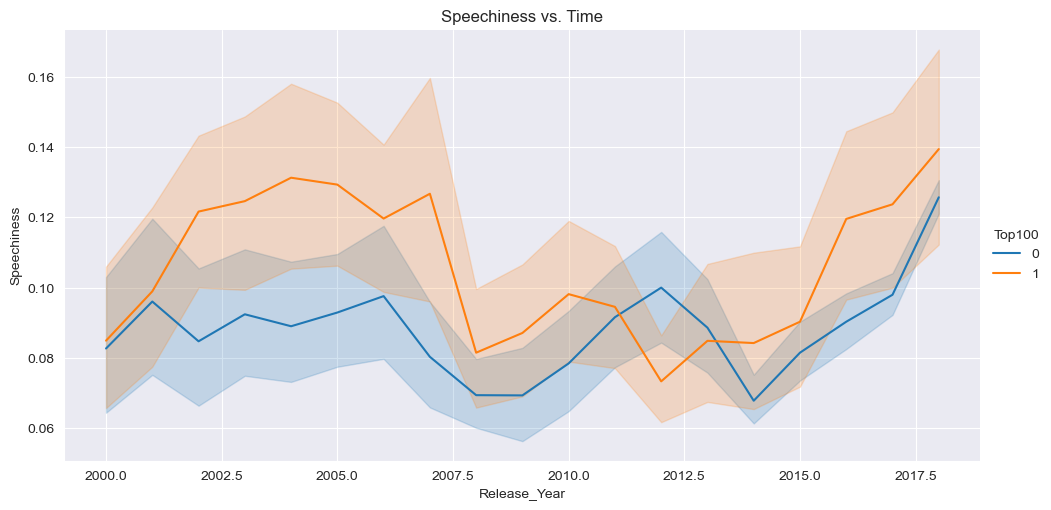

In [19]:
fig6 = sns.relplot(x="Release_Year", y="Speechiness", hue="Top100", kind="line", data=df2, height=5, aspect=2)
fig6.set(title='Speechiness vs. Time')
fig6.savefig('speech-vs-time.png')

### Acousticness vs. Time

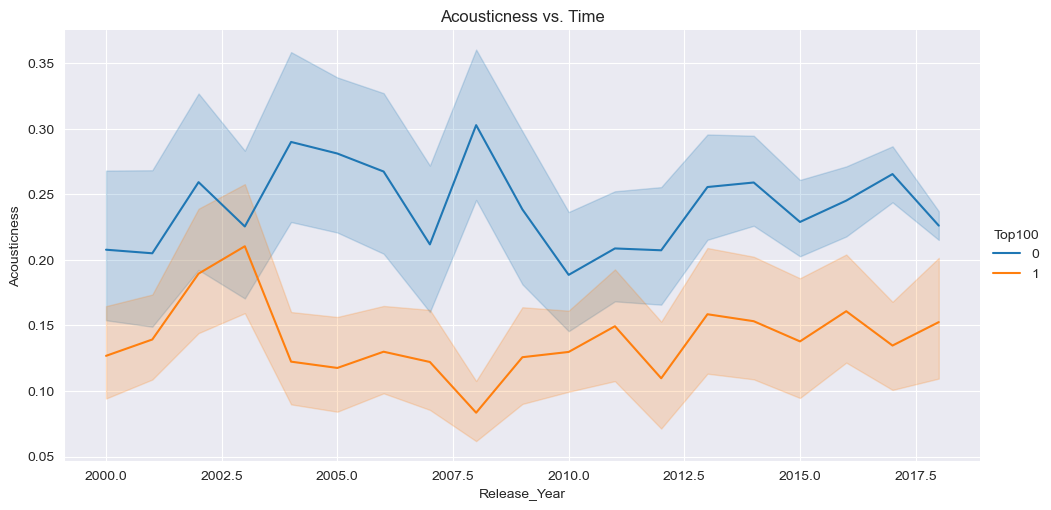

In [20]:
fig7 = sns.relplot(x="Release_Year", y="Acousticness", hue="Top100", kind="line", data=df2, height=5, aspect=2)
fig7.set(title='Acousticness vs. Time')
fig7.savefig('acoustic-vs-time.png')

### Liveness vs. Time

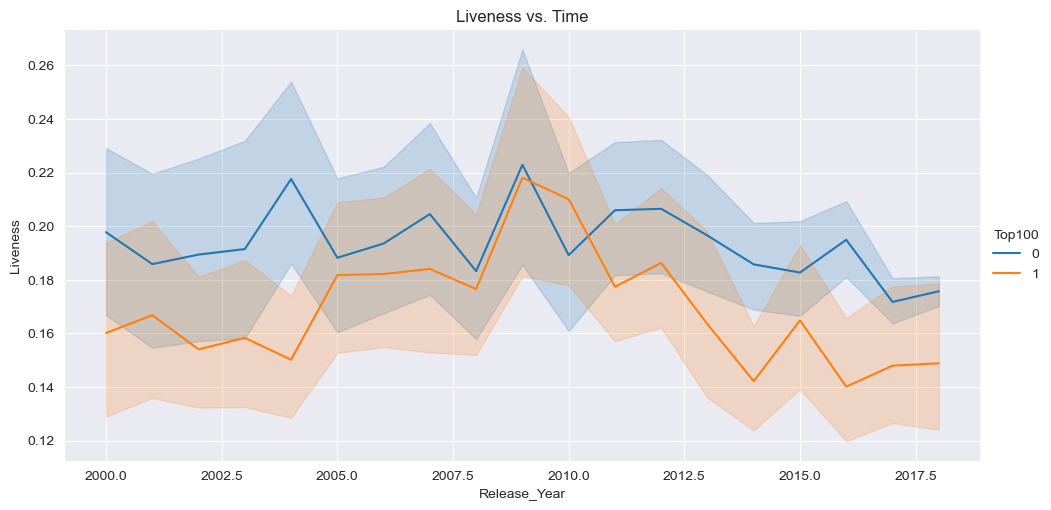

In [21]:
fig8 = sns.relplot(x="Release_Year", y="Liveness", hue="Top100", kind="line", data=df2, height=5, aspect=2)
fig8.set(title='Liveness vs. Time')
fig8.savefig('live-vs-time.png')

# Feature Comparison

#### Spotify Audio Features
 * Danceability
 * Instrumentalness
 * Acousticness
 * Valence
 * Energy
 * Liveness
 * Speechiness
 * Loudness
 * Tempo

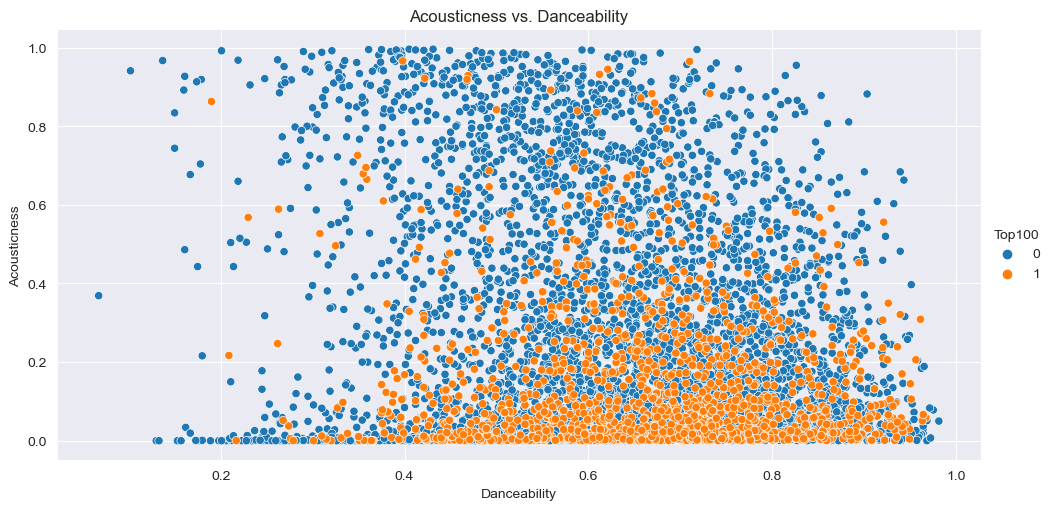

In [22]:
fig9 = sns.relplot(x="Danceability", y="Acousticness", hue="Top100", data=df2, height=5, aspect=2)
fig9.set(title='Acousticness vs. Danceability')
fig9.savefig('acoustic-vs-dance.png')

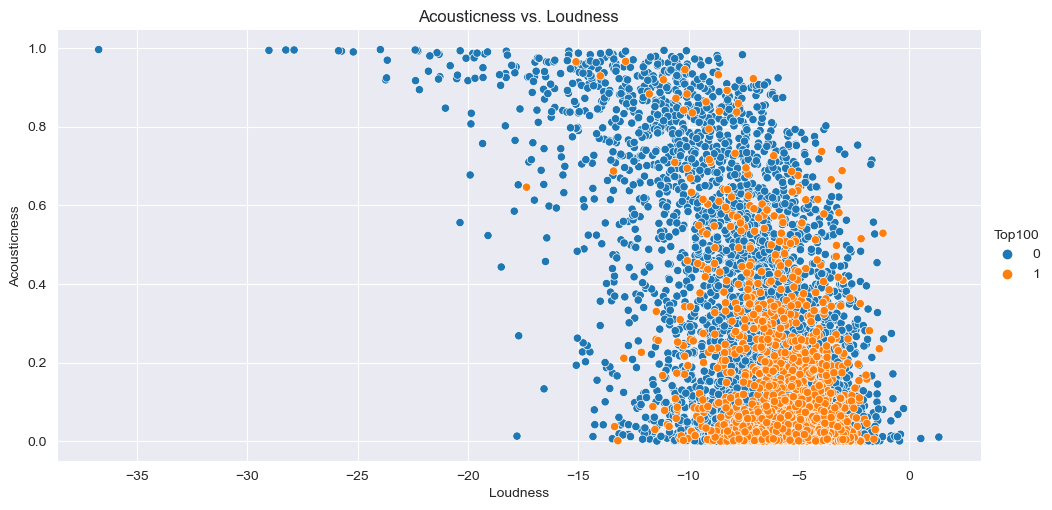

In [23]:
fig10 = sns.relplot(x="Loudness", y="Acousticness", hue="Top100", data=df2, height=5, aspect=2)
fig10.set(title='Acousticness vs. Loudness')
fig10.savefig('acoustic-vs-loud.png')

# Songs between 2010-2018

In [24]:
df3 = df[(df.Release_Year >= 2010) & (df.Release_Year < 2019)]

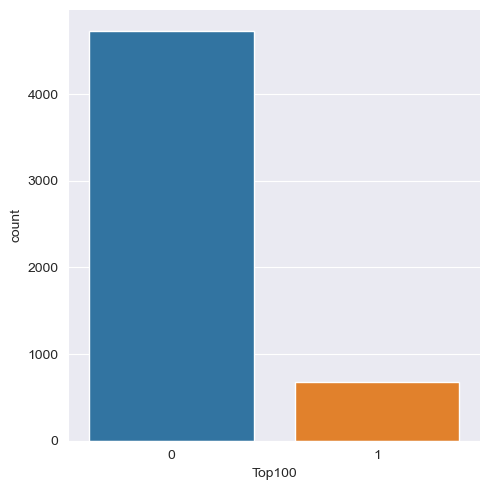

In [25]:
fig11 = sns.catplot(x="Top100", kind="count", data=df3)

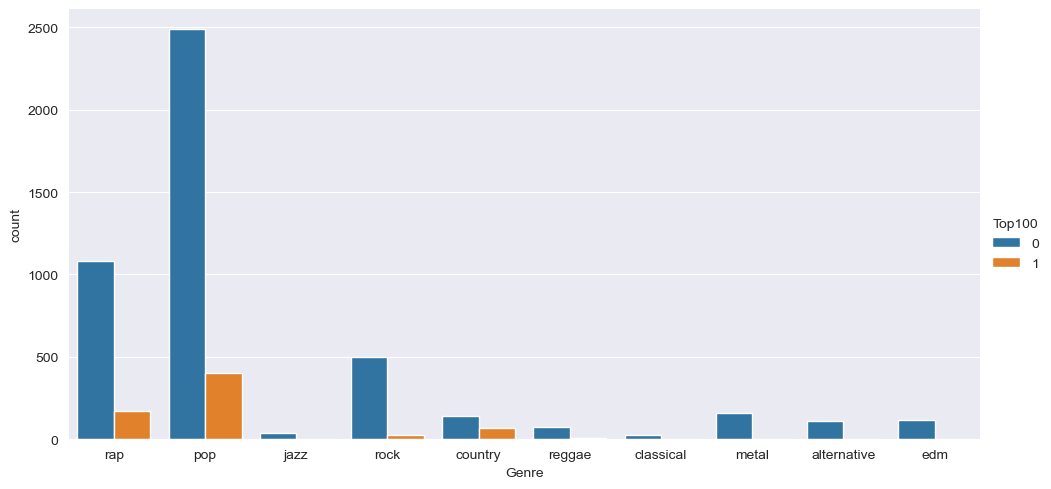

In [26]:
fig12 = sns.catplot(x='Genre', kind='count', hue='Top100', data=df3, height=5, aspect=2)

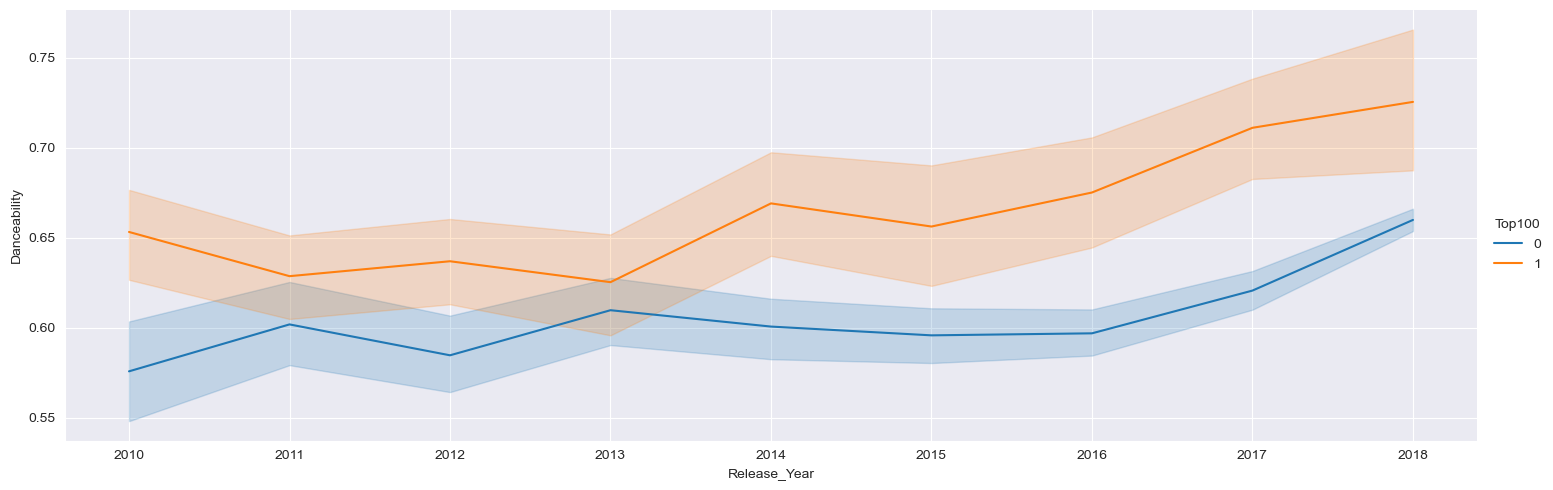

In [27]:
fig13 = sns.relplot(x="Release_Year", y="Danceability", hue="Top100", kind="line", data=df3, height=5, aspect=3)

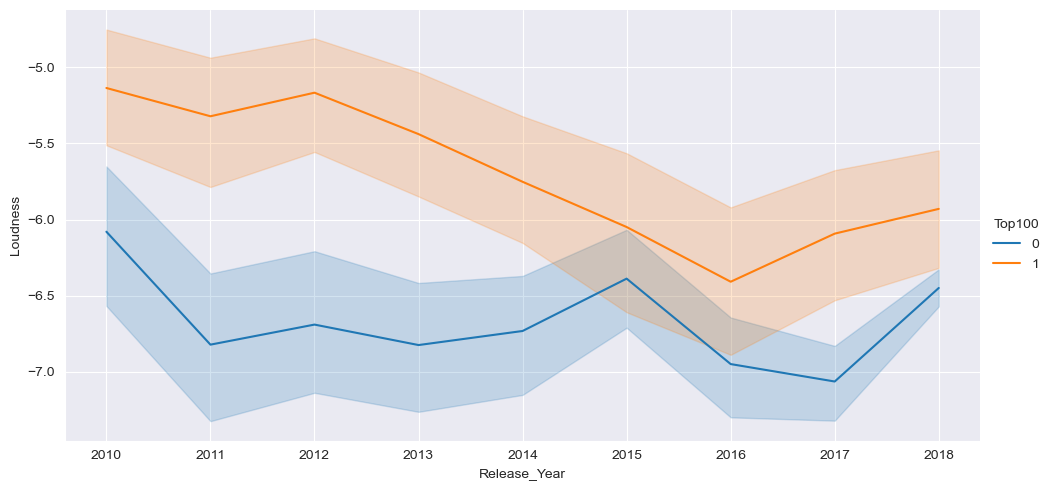

In [28]:
fig14 = sns.relplot(x="Release_Year", y="Loudness", hue="Top100", kind="line", data=df3, height=5, aspect=2)

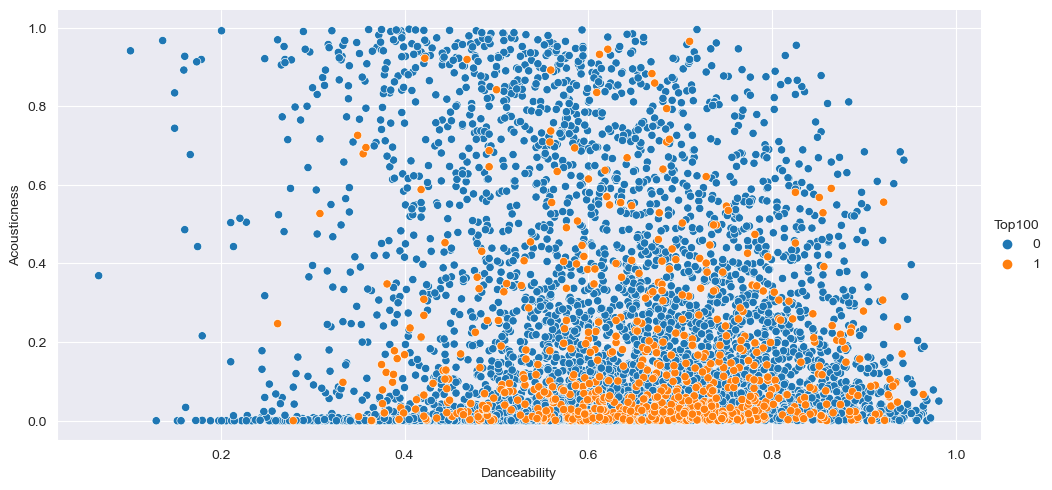

In [29]:
fig15 = sns.relplot(x="Danceability", y="Acousticness", hue="Top100", data=df3, height=5, aspect=2)